# Logistic Regression

## Importing the libraries

In [24]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

## Importing the dataset

In [25]:
dataset = pd.read_csv('breast_cancer.csv')
X = dataset.iloc[:, 1:-1].values
y = dataset.iloc[:, -1].values

## Splitting the dataset into the Training set and Test set

In [26]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 0)

# **Standardisation**

In [27]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

## Training the Logistic Regression model on the Training set

In [28]:
from sklearn.linear_model import LogisticRegression
classifier = LogisticRegression(random_state = 0)
classifier.fit(X_train, y_train)

LogisticRegression(random_state=0)

## Predicting the Test set results

In [29]:
y_pred = classifier.predict(X_test)

## Making the Confusion Matrix

In [30]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_pred)
print(cm)

[[84  3]
 [ 3 47]]


## Computing the accuracy with k-Fold Cross Validation

In [31]:
from sklearn.model_selection import cross_val_score
accuracies = cross_val_score(estimator = classifier, X = X_train, y = y_train, cv = 20)
print("Accuracy: {:.2f} %".format(accuracies.mean()*100))
print("Standard Deviation: {:.2f} %".format(accuracies.std()*100))

Accuracy: 96.90 %
Standard Deviation: 2.64 %


# **Grid Search**

In [32]:
from sklearn.model_selection import GridSearchCV
parameter = {'C': [0.25, 0.5, 0.75, 1]}
grid_search = GridSearchCV(estimator = classifier,
                           param_grid = parameter,
                           scoring = 'accuracy',
                           cv = 20,
                           n_jobs = -1)
grid_search.fit(X_train, y_train)
best_accuracy = grid_search.best_score_
best_parameter = grid_search.best_params_
print("Best Accuracy: {:.2f} %".format(best_accuracy*100))
print("Best Parameter: ", best_parameter)

Best Accuracy: 97.08 %
Best Parameter:  {'C': 0.5}


# **Visualization on Training Set**




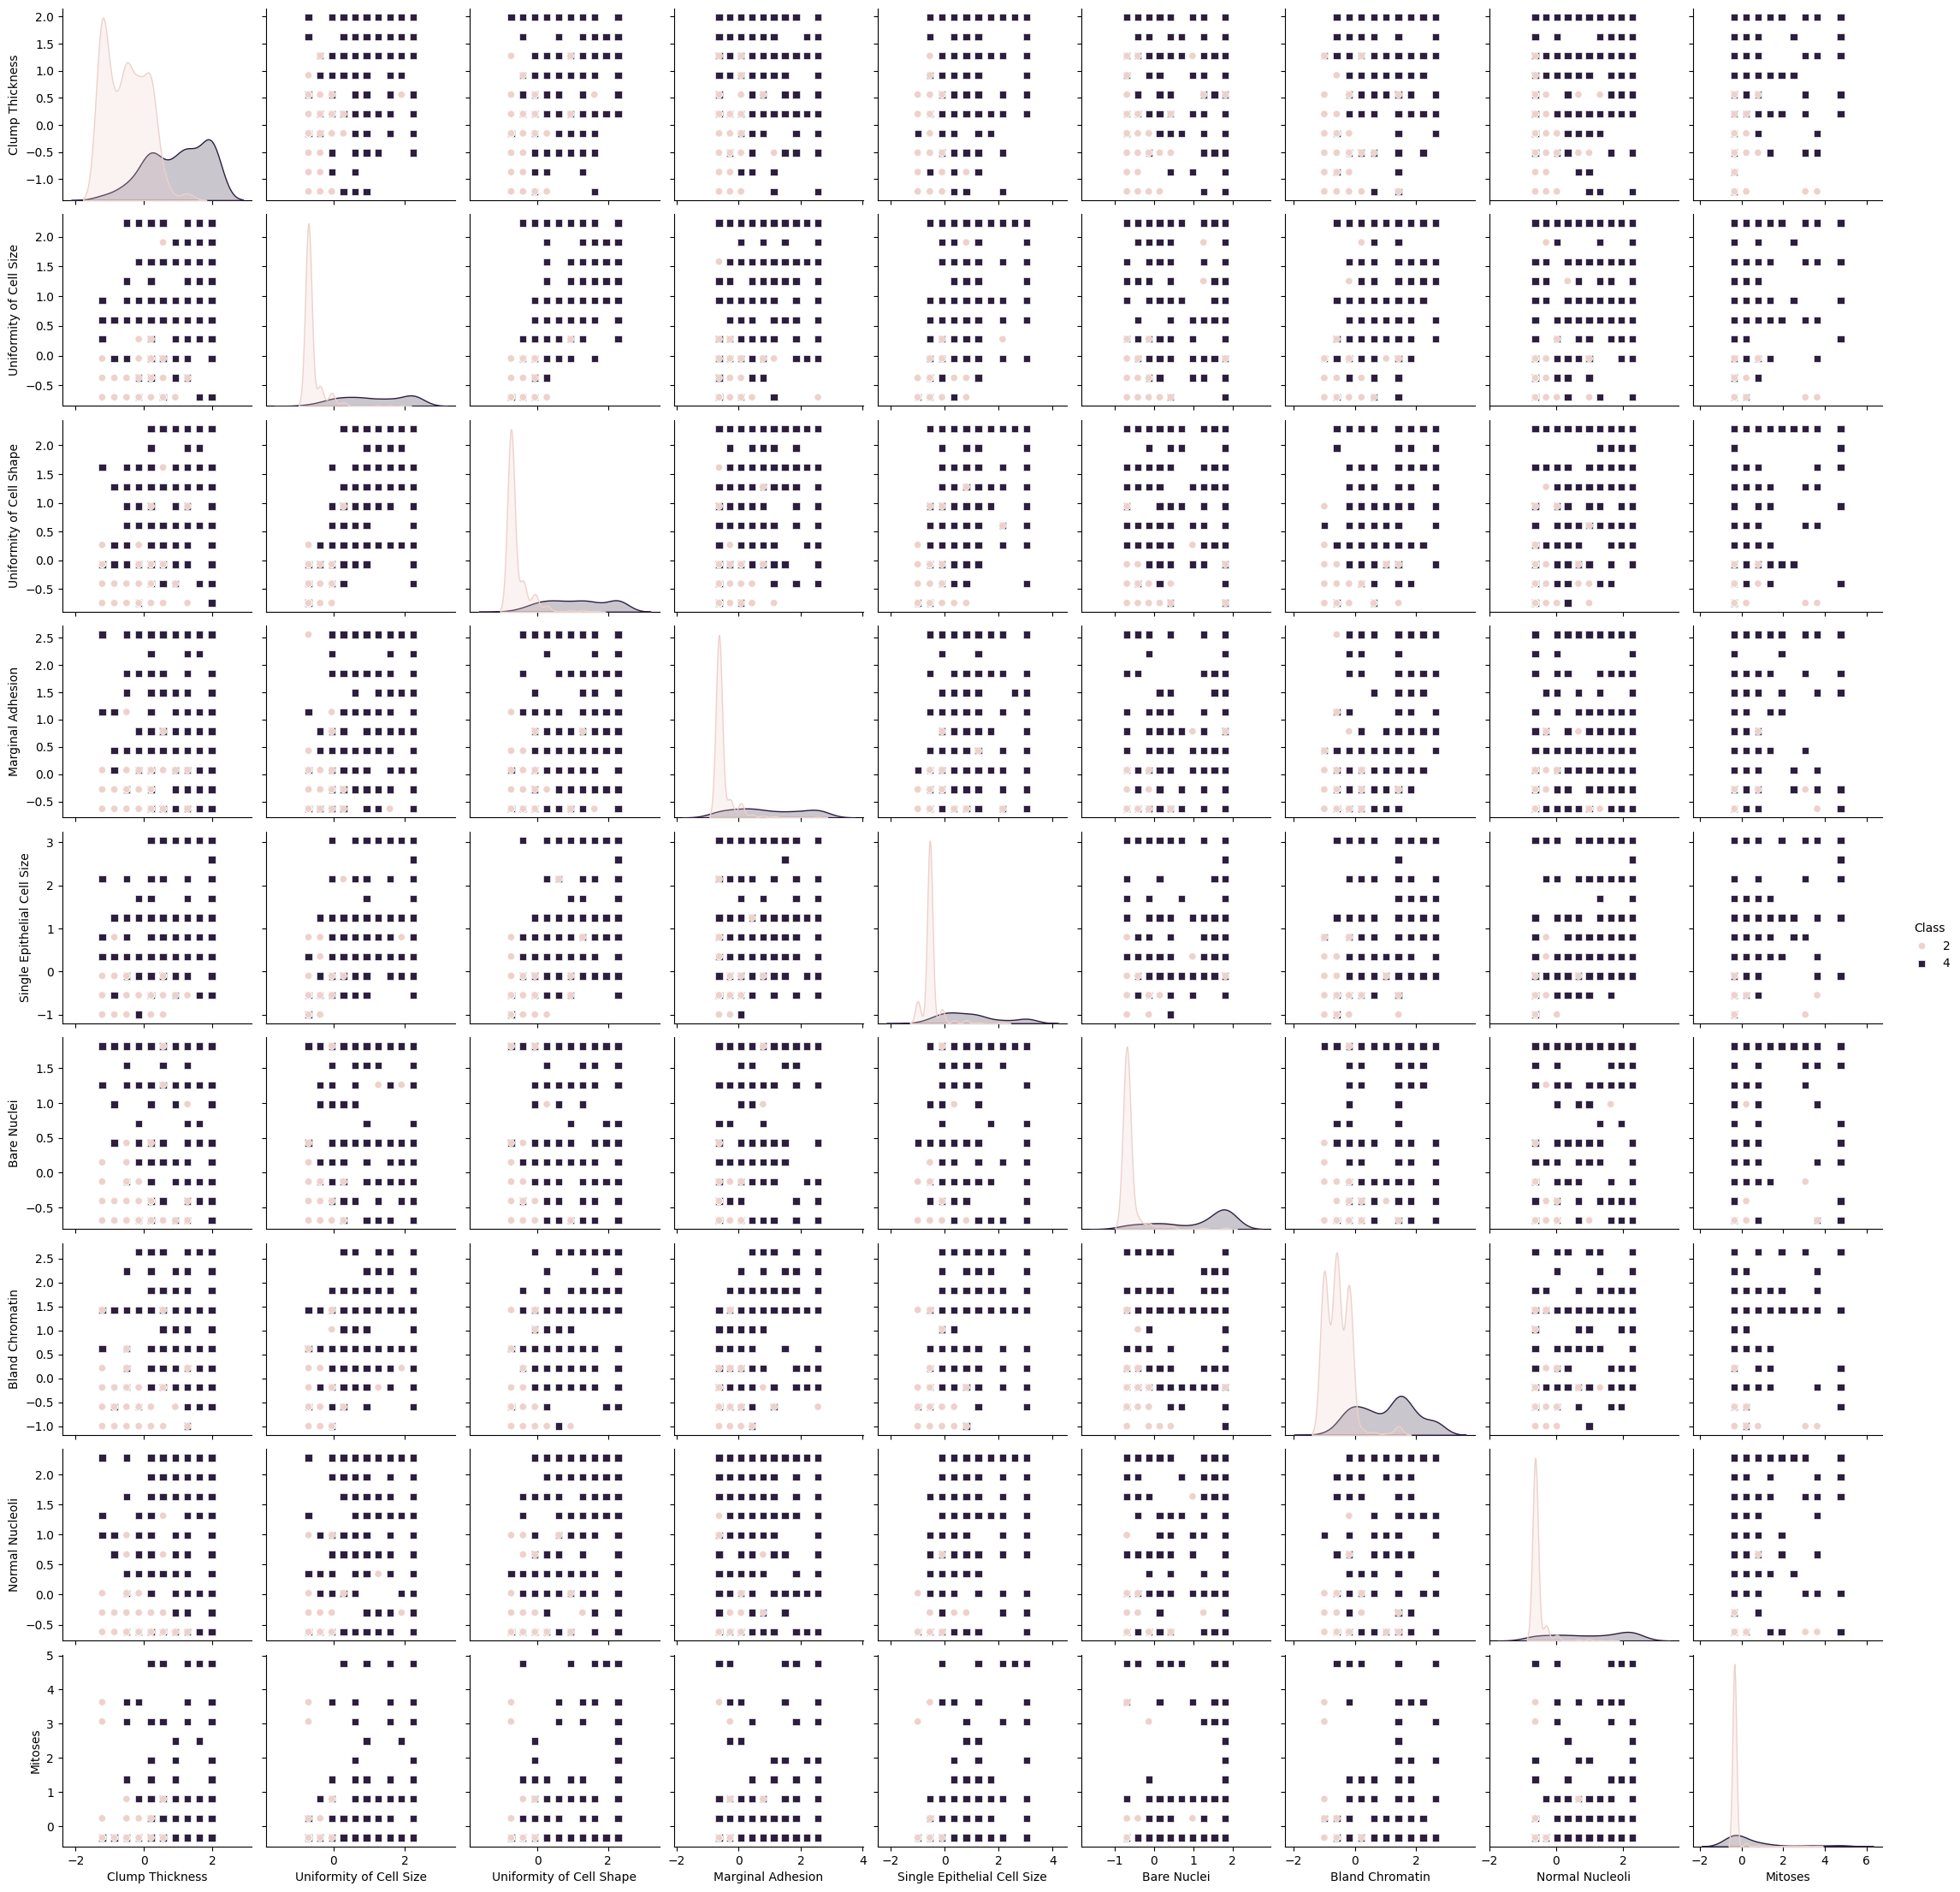

In [33]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
data_train = {
    'Clump Thickness': X_train[:, 0],
    'Uniformity of Cell Size': X_train[:, 1],
    'Uniformity of Cell Shape': X_train[:, 2],
    'Marginal Adhesion': X_train[:, 3],
    'Single Epithelial Cell Size': X_train[:, 4],
    'Bare Nuclei': X_train[:, 5],
    'Bland Chromatin': X_train[:, 6],
    'Normal Nucleoli': X_train[:, 7],
    'Mitoses': X_train[:, 8],
    'Class': y_train,
}
df_train = pd.DataFrame(data_train)
sns.pairplot(df_train, hue='Class', markers=['o', 's'])
plt.show()

# **Visualization on Training Set**

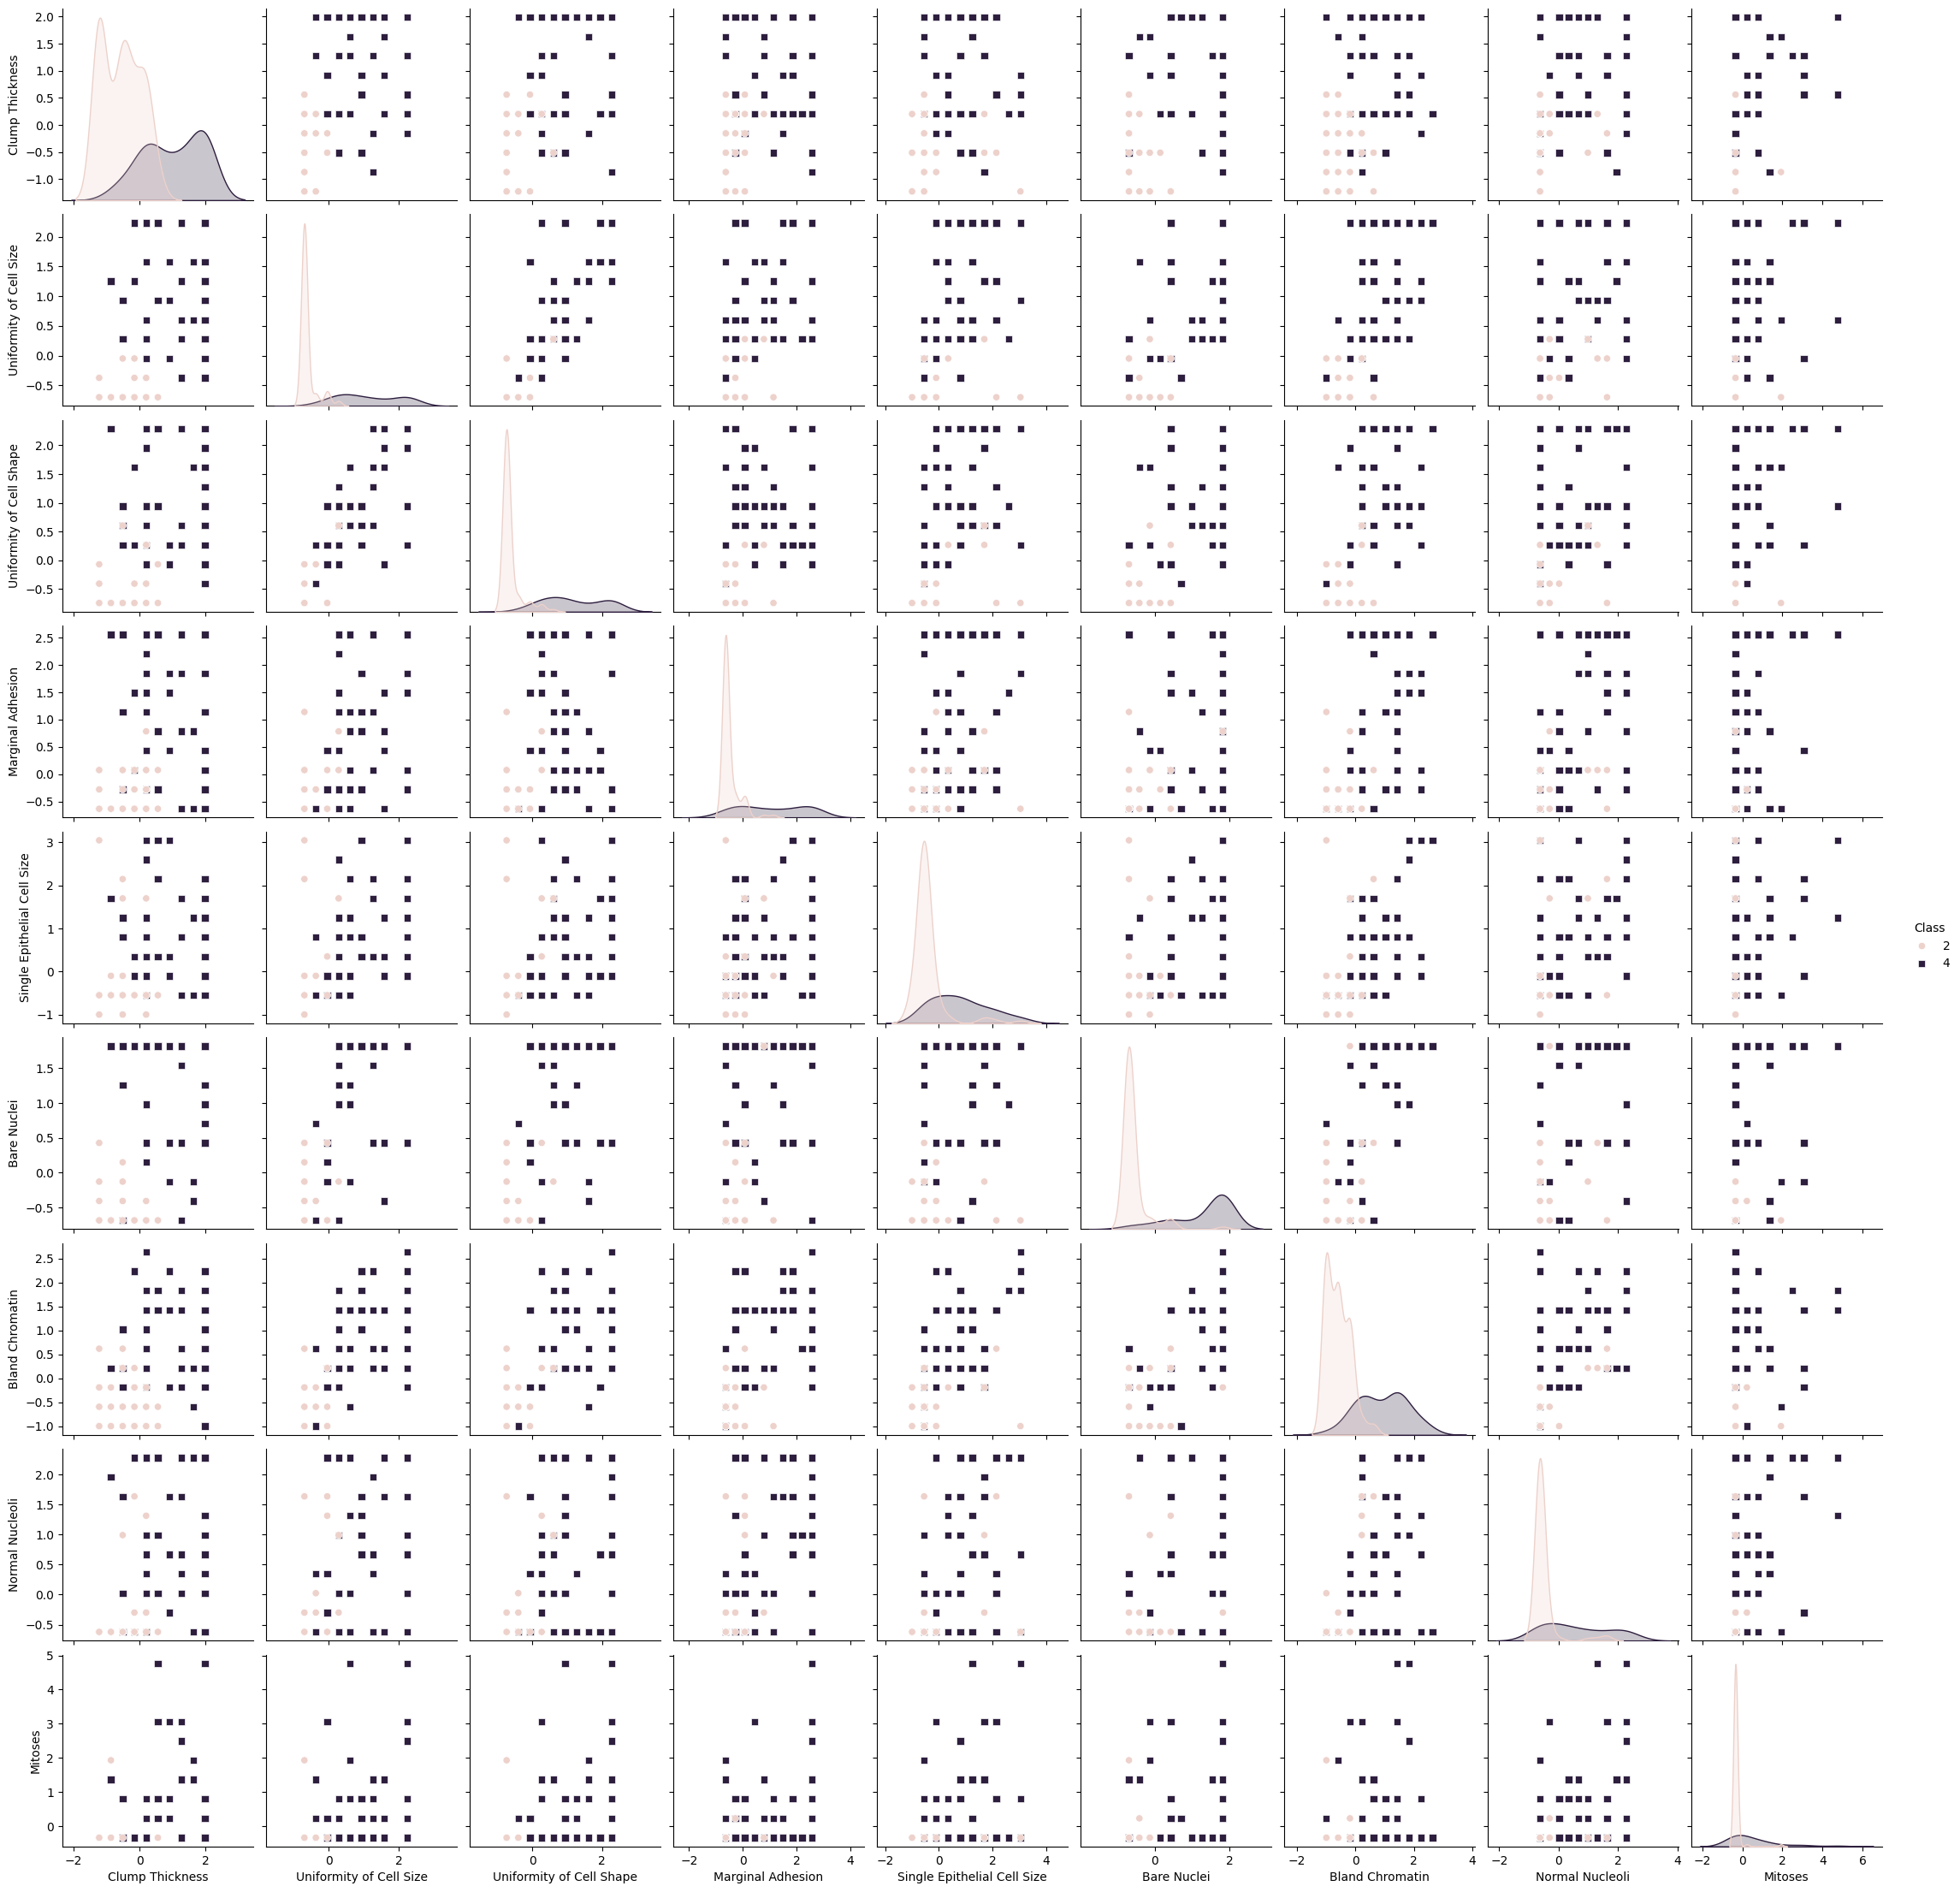

In [34]:
data_train = {
    'Clump Thickness': X_test[:, 0],
    'Uniformity of Cell Size': X_test[:, 1],
    'Uniformity of Cell Shape': X_test[:, 2],
    'Marginal Adhesion': X_test[:, 3],
    'Single Epithelial Cell Size': X_test[:, 4],
    'Bare Nuclei': X_test[:, 5],
    'Bland Chromatin': X_test[:, 6],
    'Normal Nucleoli': X_test[:, 7],
    'Mitoses': X_test[:, 8],
    'Class': y_test,
}

df_train = pd.DataFrame(data_train)

# Create a pair plot for the training set
sns.pairplot(df_train, hue='Class', markers=['o', 's'])
plt.show()